# **The Need for Machine Learning Design Patterns**

### *Loading Libraries*

In [1]:
# Data Manipualtion
import pandas as pd

# TensorFlow
import tensorflow as tf

# Scikit-Learn
from sklearn.utils import shuffle

# Google Libraries
from google.colab import auth
from google.cloud import bigquery

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !pip install --upgrade google-cloud-bigquery

#### Setting Sedd

In [3]:
# TF Random Seed
tf.random.set_seed(2)

In [4]:
auth.authenticate_user()

In [5]:
# Set up BigQuery client
project_id = 'core-catalyst-425922-v9'

client = bigquery.Client(project=project_id)

In [8]:
%%bigquery storms_df --project core-catalyst-425922-v9
SELECT
  *
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
LIMIT 1000

Query is running:   0%|          |

Downloading:   0%|          |

In [9]:
storms_df = shuffle(storms_df)

storms_df.head()

,episode_id,event_id,state,state_fips_code,event_type,cz_type,cz_fips_code,cz_name,wfo,event_begin_time,...,tor_length,tor_width,tor_other_wfo,location_index,event_range,event_azimuth,reference_location,event_latitude,event_longitude,event_point
315,1110913,5230609,We,54,cold/wind chill,Z,30,LEWIS,RLX,2001-03-01 00:00:00,...,None,None,None,1,NaN,None,None,NaN,NaN,None
421,1122984,5268300,We,54,cold/wind chill,Z,29,GILMER,RLX,2001-10-08 03:00:00,...,None,None,None,1,NaN,None,None,NaN,NaN,None
731,1112155,5236057,Il,17,dense fog,Z,87,GALLATIN,PAH,2001-03-31 00:01:00,...,None,None,None,1,NaN,None,None,NaN,NaN,None
942,1123106,5268037,Wi,55,dense fog,Z,47,GREEN LAKE,MKX,2001-09-30 03:00:00,...,None,None,None,1,NaN,None,None,NaN,NaN,None
835,1112829,5240277,Wi,55,dense fog,Z,69,ROCK,MKX,2001-04-07 02:00:00,...,None,None,None,1,NaN,None,None,NaN,NaN,None


In [10]:
shuffled_df = shuffle(storms_df, random_state=2)

shuffled_df.head()

,episode_id,event_id,state,state_fips_code,event_type,cz_type,cz_fips_code,cz_name,wfo,event_begin_time,...,tor_length,tor_width,tor_other_wfo,location_index,event_range,event_azimuth,reference_location,event_latitude,event_longitude,event_point
528,1110367,5229166,Ok,40,dense fog,Z,51,MARSHALL,OUN,2001-01-12 05:00:00,...,None,None,None,1,NaN,None,None,NaN,NaN,None
415,1122984,5268293,We,54,cold/wind chill,Z,26,BOONE,RLX,2001-10-08 03:00:00,...,None,None,None,1,NaN,None,None,NaN,NaN,None
278,1124835,5272837,Wa,53,blizzard,Z,30,NORTHWEST BLUE MOUNTAINS,PDT,2001-11-28 09:00:00,...,None,None,None,1,NaN,None,None,NaN,NaN,None
327,1110913,5230627,We,54,cold/wind chill,Z,38,WEBSTER,RLX,2001-03-01 00:00:00,...,None,None,None,1,NaN,None,None,NaN,NaN,None
849,1115575,5248219,Wi,55,dense fog,Z,52,SHEBOYGAN,MKX,2001-05-24 19:30:00,...,None,None,None,1,NaN,None,None,NaN,NaN,None


## **Data Drift**

In [12]:
%%bigquery storm_trends --project core-catalyst-425922-v9
SELECT
  SUBSTR(CAST(event_begin_time AS string), 1, 4) AS year,
  COUNT(*) AS num_storms
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
GROUP BY
  year
ORDER BY
  year ASC


Query is running:   0%|          |

Downloading:   0%|          |

In [13]:
storm_trends.head()

,year,num_storms
0,1950,223
1,1951,269
2,1952,272
3,1953,492
4,1954,609


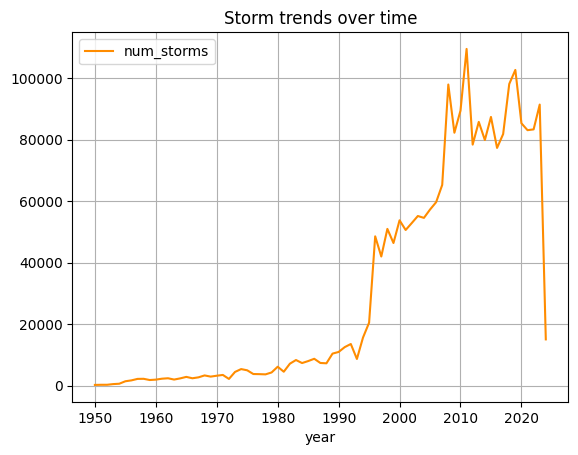

In [16]:
storm_trends.plot(title='Storm trends over time', x='year', y='num_storms', color='darkorange')

plt.grid(True)
plt.show()